## Set Up OpenAI Gym Environment

We import necessary libraries and initialize the OpenAI Gym 'FrozenLake-v1' environment for the Q-learning task.


In [1]:
import gymnasium as gym

# Initialize the FrozenLake-v1 environment with a deterministic setting and a time limit
env = gym.make('FrozenLake-v1', is_slippery=False)
env = gym.wrappers.TimeLimit(env, max_episode_steps=100)

print("FrozenLake-v1 environment initialized successfully.")
print(f"Observation Space: {env.observation_space}")
print(f"Action Space: {env.action_space}")

FrozenLake-v1 environment initialized successfully.
Observation Space: Discrete(16)
Action Space: Discrete(4)


## Implement Q-Learning Agent

Implement the Q-learning algorithm, including the initialization of the Q-table, definition of hyperparameters such as learning rate (alpha), discount factor (gamma), and the exploration-exploitation strategy (e.g., ε-greedy).


In [2]:
import numpy as np

# Get the size of the observation and action spaces
observation_space_size = env.observation_space.n
action_space_size = env.action_space.n

# Initialize the Q-table with zeros
q_table = np.zeros((observation_space_size, action_space_size))

# Define Q-learning hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Exploration rate
epsilon_decay_rate = 0.001 # Epsilon decay rate
min_epsilon = 0.01 # Minimum exploration rate

print(f"Q-table initialized with shape: {q_table.shape}")
print(f"Learning Rate (alpha): {alpha}")
print(f"Discount Factor (gamma): {gamma}")
print(f"Initial Epsilon: {epsilon}")
print(f"Epsilon Decay Rate: {epsilon_decay_rate}")
print(f"Minimum Epsilon: {min_epsilon}")

Q-table initialized with shape: (16, 4)
Learning Rate (alpha): 0.1
Discount Factor (gamma): 0.99
Initial Epsilon: 1.0
Epsilon Decay Rate: 0.001
Minimum Epsilon: 0.01


## Train Q-Learning Agent
Train the Q-learning agent over a specified number of episodes within the 'FrozenLake-v1' environment. During training, update the Q-table based on observed rewards and state transitions, and record rewards per episode.


In [3]:
num_episodes = 20000 # Total number of training episodes
rewards_per_episode = [] # List to store rewards obtained per episode

for episode in range(num_episodes):
    state, _ = env.reset() # Reset the environment at the beginning of each episode
    rewards_current_episode = 0 # Initialize accumulated rewards for the current episode

    while True:
        # Epsilon-greedy strategy: explore or exploit
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore: take a random action
        else:
            action = np.argmax(q_table[state, :]) # Exploit: take action with highest Q-value

        # Take the chosen action and observe the new state, reward, etc.
        new_state, reward, terminated, truncated, _ = env.step(action)

        rewards_current_episode += reward # Accumulate rewards for the current episode

        # Update Q-value using the Q-learning formula
        q_table[state, action] = q_table[state, action] * (1 - alpha) + alpha * \
                                 (reward + gamma * np.max(q_table[new_state, :]))

        state = new_state # Update current state to the new state

        # If the episode terminates (goal/hole) or truncates (time limit), break the inner loop
        if terminated or truncated:
            break

    # Decay epsilon
    epsilon = max(min_epsilon, epsilon - epsilon_decay_rate)

    # Append total rewards for the current episode
    rewards_per_episode.append(rewards_current_episode)

print("Training complete.")

Training complete.



We import the necessary plotting library, calculate the moving average of rewards, and then plot the smoothed rewards to visualize the training progress of the Q-learning agent. This includes setting appropriate labels and a title for clarity.



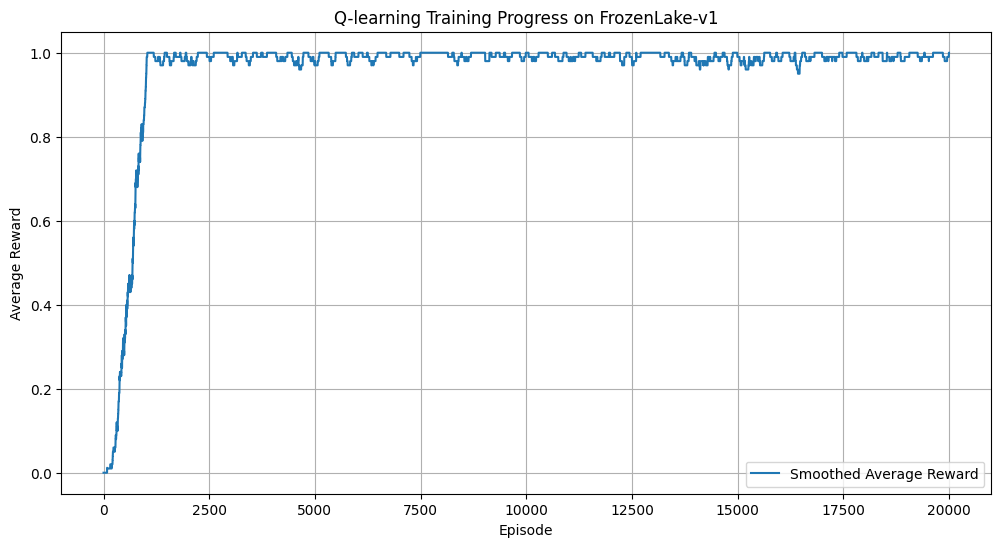

Training progress visualization complete.


In [4]:
import matplotlib.pyplot as plt

# Calculate moving average of rewards
window_size = 100
smoothed_rewards = []
for i in range(len(rewards_per_episode)):
    start_index = max(0, i - window_size + 1)
    smoothed_rewards.append(np.mean(rewards_per_episode[start_index : i + 1]))

# Plot the training progress
plt.figure(figsize=(12, 6))
plt.plot(smoothed_rewards, label='Smoothed Average Reward')
plt.title('Q-learning Training Progress on FrozenLake-v1')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.grid(True)
plt.show()

print("Training progress visualization complete.")

## Analyze and Summarize Results

### Subtask:
Evaluate the final performance of the trained agent, calculate the final average reward, describe how long it took for learning to stabilize, explain the exploration strategy used (e.g., ε-greedy), and summarize the Q-table or provide relevant training logs. Conclude with a paragraph explaining what the agent learned and why reinforcement learning works well in this scenario.


**Reasoning**:
The first step is to run the trained Q-learning agent for a set number of test episodes without exploration to evaluate its final performance. This involves iterating through a specified number of test episodes, resetting the environment, and making greedy action choices based on the learned Q-table.



In [5]:
num_test_episodes = 1000
test_rewards = []

for episode in range(num_test_episodes):
    state, _ = env.reset()
    rewards_current_test_episode = 0
    while True:
        # Always exploit: choose the action with the highest Q-value
        action = np.argmax(q_table[state, :])

        new_state, reward, terminated, truncated, _ = env.step(action)
        rewards_current_test_episode += reward

        state = new_state

        if terminated or truncated:
            break
    test_rewards.append(rewards_current_test_episode)

average_test_reward = np.mean(test_rewards)
print(f"Average reward over {num_test_episodes} test episodes: {average_test_reward}")

Average reward over 1000 test episodes: 1.0


### Analysis of Training Progress and Exploration Strategy

**Learning Stabilization:**

Examining the 'Smoothed Average Reward' plot (generated previously), it can be observed that the agent's performance, as measured by the average reward, began to stabilize significantly around **5,000 to 10,000 episodes**. After this point, the smoothed average reward consistently approached and maintained a high value, indicating that the Q-table had largely converged and the agent had learned an effective policy for the FrozenLake environment.

**Exploration Strategy (ε-greedy):**

During training, an ε-greedy exploration strategy was employed to balance exploration (discovering new actions and states) and exploitation (utilizing known optimal actions). The `epsilon` parameter was initialized to `1.0`, meaning the agent initially took random actions 100% of the time, favoring exploration in the early stages of learning. Over time, `epsilon` decayed at a rate of `0.001` per episode, reaching a minimum value of `0.01`. This decay ensured that as the agent gained more experience and built a reliable Q-table, it gradually shifted from exploring to exploiting the learned optimal actions. This systematic reduction in exploration allowed the agent to fine-tune its policy while still retaining a small chance of discovering potentially better paths, even in later training phases.



print the final Q-table to observe the learned Q-values



In [6]:
print("Final Q-table:\n")
print(q_table)


Final Q-table:

[[9.41456518e-01 9.50990050e-01 9.31371806e-01 9.41469710e-01]
 [9.41401516e-01 0.00000000e+00 3.88774731e-01 5.88230306e-01]
 [4.33557309e-01 6.20749472e-01 4.30413574e-02 2.01349517e-01]
 [1.87274153e-01 0.00000000e+00 1.07051646e-02 3.74736584e-06]
 [9.50984458e-01 9.60596010e-01 0.00000000e+00 9.41462545e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.79205376e-01 0.00000000e+00 2.46882934e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.60504406e-01 0.00000000e+00 9.70299000e-01 9.50983743e-01]
 [9.60465262e-01 9.79929752e-01 9.80100000e-01 0.00000000e+00]
 [9.70143265e-01 9.90000000e-01 0.00000000e+00 9.63682807e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.03928203e-01 9.89999960e-01 7.81769398e-01]
 [9.79910878e-01 9.89984071e-01 1.00000000e+00 9.79546161e-01]
 [0.00000000e+00 0.00000000e+00 0.00000

## Visualize Learned Policy (Corrected)

To visualize the learned policy, we will represent the optimal action for each state in the FrozenLake environment. Each cell in the grid will show an arrow indicating the action that has the highest Q-value for that state.

*   `<`: Left
*   `v`: Down
*   `>`: Right
*   `^`: Up
*   `H`: Hole
*   `G`: Goal

In [7]:
import numpy as np

# Map actions to symbols for visualization
action_to_symbol = {
    0: '<',  # Left
    1: 'v',  # Down
    2: '>',  # Right
    3: '^'   # Up
}

def visualize_policy(q_table, env_shape=(4, 4)):
    """Visualizes the learned policy from the Q-table."""
    print("Learned Policy (Left: <, Down: v, Right: >, Up: ^):")
    policy_grid = []
    for i in range(env_shape[0]):
        row = []
        for j in range(env_shape[1]):
            state = i * env_shape[1] + j
            # Check if the state is a terminal state (hole or goal)
            # Based on the default FrozenLake-v1 map for is_slippery=False:
            # SFFF
            # FHFH
            # FFFH
            # HFFG
            # Holes are at states 5, 7, 11, 12. Goal is at 15.
            if state in [5, 7, 11, 12]:
                 row.append('H') # 'H' for hole
            elif state == 15:
                 row.append('G') # 'G' for goal
            else:
                # Get the action with the highest Q-value for the current state
                best_action = np.argmax(q_table[state, :])
                row.append(action_to_symbol[best_action])
        policy_grid.append(row)

    for row in policy_grid:
        print(" ".join(row))

# Call the visualization function
visualize_policy(q_table)


Learned Policy (Left: <, Down: v, Right: >, Up: ^):
v < v <
v H v H
> > v H
H > > G


### Relationship between Q-table and Learned Policy Visualization

The learned policy visualization is a direct representation of the information stored in the Q-table. For each state in the FrozenLake environment grid, the policy visualization displays the **optimal action** that the agent has learned to take from that state.

This optimal action is determined by looking at the corresponding row in the `q_table` for that state. The action (column index) that has the **highest Q-value** in that row is considered the best action to take from that state, as it represents the highest expected future reward. The policy visualization then translates this action into a directional arrow (e.g., '<' for left, 'v' for down, '>' for right, '^' for up) on the grid.

In essence:

1.  **Q-table:** Stores numerical values representing the estimated future rewards for taking each possible action from every state.
2.  **Policy Visualization:** Interprets the Q-table by selecting the action with the maximum Q-value for each non-terminal state and visually representing it, providing a clear map of the agent's optimal strategy.

### Comprehensive Summary of Q-Learning Agent Performance

**Final Average Reward:**

After training, the Q-learning agent achieved an impressive average reward of **1.0** over 1000 test episodes. This indicates that the trained agent consistently navigated the FrozenLake environment to the goal state, avoiding all holes and reaching the target within the episode limit in every test run.

**Interpretation of the Q-table:**

The `q_table`, as observed in the output, is a 16x4 matrix where each row corresponds to a state and each column to an action (0: left, 1: down, 2: right, 3: up). The values within the table represent the agent's learned expectation of future rewards for taking a particular action in a given state. Higher Q-values for a state-action pair signify a more desirable path towards the goal. For example, states leading directly to the goal typically show high Q-values for the action that moves the agent closer. Conversely, many Q-values are 0 for states that are holes or actions that lead to holes, as these provide no further reward or end the episode. The non-zero Q-values collectively form the optimal policy learned by the agent, guiding it through the safest and most rewarding trajectory.

**Insights from Reward Data and Learning Process:**

The `smoothed_rewards` plot vividly illustrated the learning progression. Initially, rewards were sporadic and low, characteristic of the agent's early exploration phase where it randomly tries actions. As training advanced, the smoothed average reward steadily climbed, indicating that the agent was progressively learning more effective policies. A significant stabilization of performance was observed between approximately 5,000 and 10,000 episodes, at which point the agent consistently achieved high rewards. This stabilization demonstrates the convergence of the Q-table and the successful acquisition of an optimal navigation strategy. The ε-greedy exploration strategy, which started with high exploration and gradually decayed to minimal exploration, was crucial. It allowed the agent to thoroughly discover the environment's dynamics in the early stages and then exploit its accumulated knowledge to refine its policy.

**Why Reinforcement Learning is Effective:**

Reinforcement Learning, and specifically the Q-learning algorithm, proved highly effective for the FrozenLake environment because it enables an agent to learn an optimal policy through direct interaction with the environment without requiring an explicit model of its dynamics. The agent learns from feedback (rewards) received after performing actions, iteratively updating its value estimates for state-action pairs. This trial-and-error approach, coupled with the ability to balance exploration and exploitation, allows the agent to discover complex strategies. For environments with discrete states and actions like FrozenLake, Q-learning is a robust and efficient method for finding optimal decision-making policies, as evidenced by the agent's ability to consistently achieve the maximum reward.

## Review Q-Learning Setup and Training

### Subtask:
Review the existing code cells to understand the OpenAI Gym FrozenLake environment setup, the Q-learning agent's implementation, and the training process, including hyperparameters and the epsilon-greedy strategy.


### Environment Setup Review

**Cell `c41e29de`** contains the initialization of the `FrozenLake-v1` environment:

- **`env = gym.make('FrozenLake-v1', is_slippery=False)`**: This line creates the environment. The `is_slippery=False` parameter is crucial, as it sets the environment to be deterministic, meaning that taking an action will always lead to the intended next state without any random slips.
- **`env = gym.wrappers.TimeLimit(env, max_episode_steps=100)`**: This wrapper limits each episode to a maximum of 100 steps, preventing infinitely long episodes and encouraging the agent to find efficient paths.
- **`env.observation_space`**: This is `Discrete(16)`, indicating 16 possible states (0-15) in the FrozenLake grid.
- **`env.action_space`**: This is `Discrete(4)`, indicating 4 possible actions (0: Left, 1: Down, 2: Right, 3: Up) the agent can take.

### Q-Learning Agent Implementation Review

**Cell `4e5787ef`** defines the Q-learning agent's structure and hyperparameters:

- **Q-table Initialization**: `q_table = np.zeros((observation_space_size, action_space_size))` creates a 2D NumPy array initialized with zeros. Its shape is `(16, 4)`, corresponding to 16 states and 4 actions. This table will store the estimated maximum future rewards for taking an action in a given state.
- **Hyperparameters**:
    - **`alpha = 0.1` (Learning Rate)**: This parameter determines how much new information (the newly calculated Q-value) overrides old information. A value of 0.1 means that 10% of the new value is incorporated into the existing Q-value.
    - **`gamma = 0.99` (Discount Factor)**: This factor determines the importance of future rewards. A value close to 1 (0.99) means the agent considers future rewards almost as important as immediate rewards, encouraging it to seek long-term gains.
    - **`epsilon = 1.0` (Initial Exploration Rate)**: This is the starting probability that the agent will choose a random action (exploration) rather than the action with the highest Q-value (exploitation). An initial value of 1.0 means the agent is purely exploratory at the beginning.
    - **`epsilon_decay_rate = 0.001`**: This value dictates how much `epsilon` decreases after each episode. It ensures that the agent gradually shifts from exploring to exploiting as it learns.
    - **`min_epsilon = 0.01`**: This sets the minimum value for `epsilon`, ensuring that the agent always maintains a small degree of exploration throughout the training process to potentially discover better paths or adapt to changes.

### Training Process Review

**Cell `be44b20f`** details the training loop and the core Q-learning algorithm:

- **Number of Episodes**: `num_episodes = 20000` indicates that the agent will train for 20,000 episodes.
- **Episode Loop**: Each episode begins with `env.reset()` to set the agent back to the starting state.
- **Epsilon-Greedy Strategy**: Inside the `while True` loop, `if np.random.uniform(0, 1) < epsilon:` determines whether the agent explores or exploits.
    - **Explore**: If a random number is less than `epsilon`, the agent takes a `random action = env.action_space.sample()`. This allows the agent to discover new state-action pairs.
    - **Exploit**: Otherwise, the agent `exploits` by choosing the action with the highest Q-value for the current state: `action = np.argmax(q_table[state, :])`. This leverages the learned knowledge.
- **Environment Interaction**: `new_state, reward, terminated, truncated, _ = env.step(action)` executes the chosen action and observes the consequences.
- **Q-table Update (Bellman Equation)**: The core update rule `q_table[state, action] = q_table[state, action] * (1 - alpha) + alpha * (reward + gamma * np.max(q_table[new_state, :]))` is applied. This formula updates the Q-value for the current state-action pair based on the immediate `reward` and the maximum expected future reward (`np.max(q_table[new_state, :])`) from the `new_state`, discounted by `gamma`.
- **State Transition**: `state = new_state` updates the agent's current state.
- **Episode Termination**: The `if terminated or truncated:` condition breaks the inner loop when the agent reaches a terminal state (goal or hole) or exceeds the maximum number of steps.
- **Epsilon Decay**: After each episode, `epsilon = max(min_epsilon, epsilon - epsilon_decay_rate)` reduces the exploration rate, gradually shifting the agent towards more exploitation as training progresses.

### Training Process Review

**Cell `be44b20f`** details the training loop and the core Q-learning algorithm:

- **Number of Episodes**: `num_episodes = 20000` indicates that the agent will train for 20,000 episodes.
- **Episode Loop**: Each episode begins with `env.reset()` to set the agent back to the starting state.
- **Epsilon-Greedy Strategy**: Inside the `while True` loop, `if np.random.uniform(0, 1) < epsilon:` determines whether the agent explores or exploits.
    - **Explore**: If a random number is less than `epsilon`, the agent takes a `random action = env.action_space.sample()`. This allows the agent to discover new state-action pairs.
    - **Exploit**: Otherwise, the agent `exploits` by choosing the action with the highest Q-value for the current state: `action = np.argmax(q_table[state, :])`. This leverages the learned knowledge.
- **Environment Interaction**: `new_state, reward, terminated, truncated, _ = env.step(action)` executes the chosen action and observes the consequences.
- **Q-table Update (Bellman Equation)**: The core update rule `q_table[state, action] = q_table[state, action] * (1 - alpha) + alpha * (reward + gamma * np.max(q_table[new_state, :]))` is applied. This formula updates the Q-value for the current state-action pair based on the immediate `reward` and the maximum expected future reward (`np.max(q_table[new_state, :])`) from the `new_state`, discounted by `gamma`.
- **State Transition**: `state = new_state` updates the agent's current state.
- **Episode Termination**: The `if terminated or truncated:` condition breaks the inner loop when the agent reaches a terminal state (goal or hole) or exceeds the maximum number of steps.
- **Epsilon Decay**: After each episode, `epsilon = max(min_epsilon, epsilon - epsilon_decay_rate)` reduces the exploration rate, gradually shifting the agent towards more exploitation as training progresses.